In [ ]:
# our main objective here is to report back to the institution how we can best cluster together the different countries
# so that we can make much more precise prescriptions for plans of economic development

In [ ]:
!pip install kneed

In [1]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import umap
import numpy as np
import kneed

In [2]:
df = pd.read_csv('Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
num_cols = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

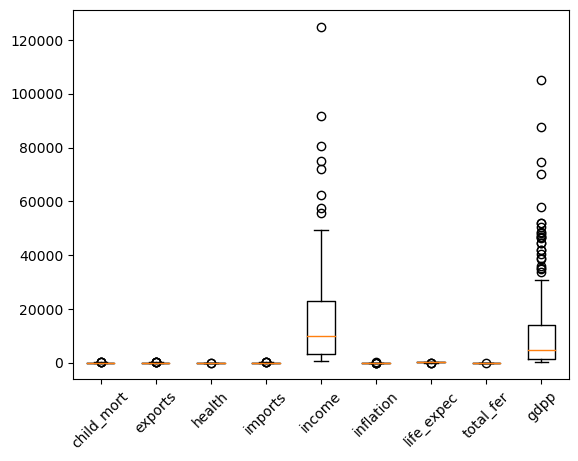

In [5]:
plt.boxplot(df[num_cols])
plt.xticks((range(1,len(num_cols)+1,1)),num_cols,rotation = 45)
plt.show()

In [6]:
df_orig= df.copy()

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
df[num_cols] = scaler.fit_transform(df[num_cols])

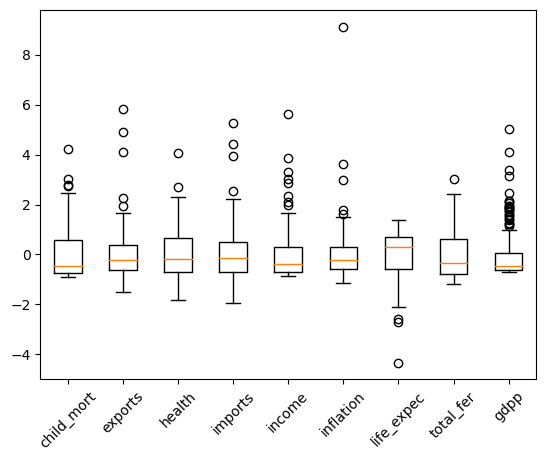

In [9]:
plt.boxplot(df[num_cols])
plt.xticks((range(1,len(num_cols)+1,1)),num_cols,rotation = 45)
plt.show()

In [10]:
from sklearn.decomposition import PCA

In [12]:
pca9 = PCA(n_components=len(num_cols))
pca9.fit( df[num_cols])

PCA(n_components=9)

In [33]:
knee = kneed.KneeLocator(range(1,pca9.n_components_+1),np.cumsum(pca9.explained_variance_)/np.cumsum(pca9.explained_variance_)[-1],curve = 'concave',direction= 'increasing')

In [35]:
knee.all_elbows

{5}

In [15]:
np.cumsum(pca9.explained_variance_)/np.cumsum(pca9.explained_variance_)[-1]

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

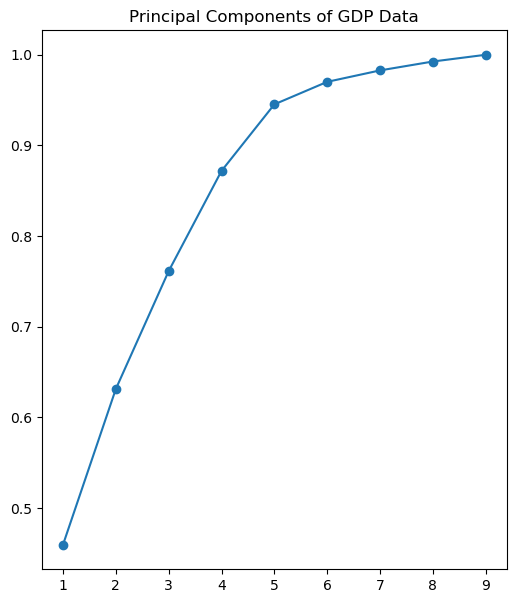

In [32]:
plt.figure(figsize=(6,7))
plt.plot(range(1,pca9.n_components_+1),np.cumsum(pca9.explained_variance_)/np.cumsum(pca9.explained_variance_)[-1],'-o')
plt.title('Principal Components of GDP Data')
plt.show()

## scrapwork

In [19]:
pca2 = PCA(n_components=2)

In [20]:
cnts_2d = pca2.fit_transform(df[num_cols])

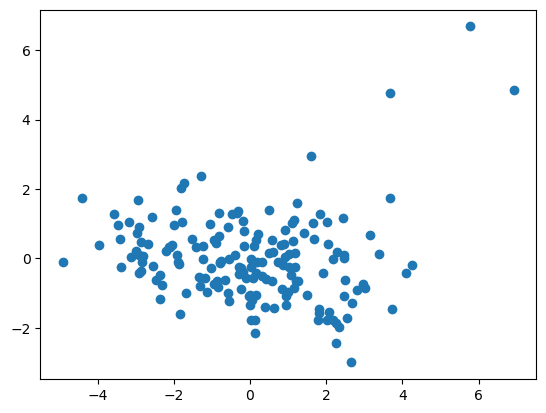

In [21]:
plt.scatter(cnts_2d[:,0],cnts_2d[:,1])

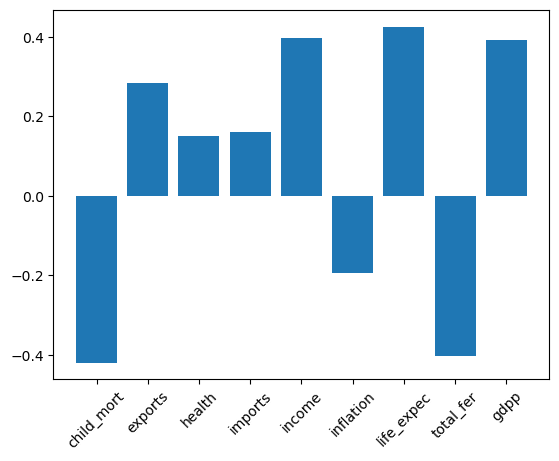

In [22]:
plt.bar(x=num_cols, height = pca9.components_[0])
plt.xticks(rotation=45)
plt.show()

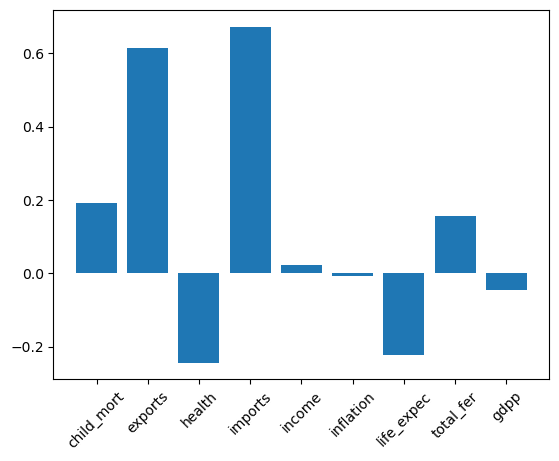

In [23]:
plt.bar(x=num_cols, height = pca9.components_[1])
plt.xticks(rotation=45)
plt.show()

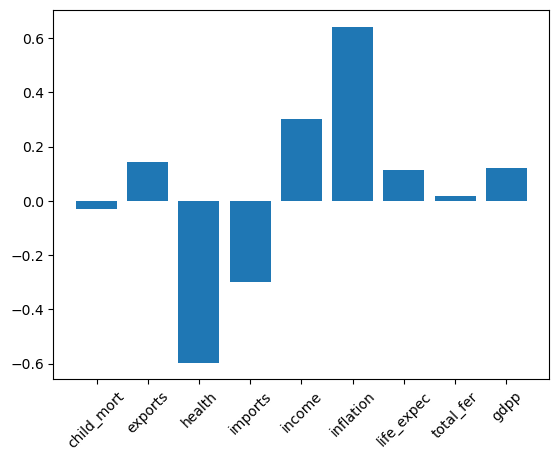

In [24]:
plt.bar(x=num_cols, height = pca9.components_[2])
plt.xticks(rotation=45)
plt.show()

In [88]:
pca4 = PCA(n_components=5)
cnts_4d = pca4.fit_transform(df[num_cols])

In [89]:
from sklearn.cluster import HDBSCAN

In [90]:
clus = HDBSCAN()

In [91]:
clusters = clus.fit_predict(cnts_4d)

In [92]:
clusters

array([ 2,  1,  1, -1,  1, -1,  1,  0,  0,  1,  1, -1, -1,  1, -1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1,  1,  2, -1,  1,  3,  0,  1, -1, -1,  1,
        1,  1,  3, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,
       -1,  1,  0,  0, -1,  3, -1,  0, -1,  0,  1,  1, -1, -1,  1, -1,  1,
        0,  1, -1, -1, -1, -1,  0,  0,  1,  0, -1, -1,  3, -1, -1, -1, -1,
        1,  1, -1, -1, -1,  1, -1,  1,  3,  2, -1,  1,  2, -1, -1,  1, -1,
       -1, -1,  1,  1,  2, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  3,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1,  1, -1,  1,  0, -1, -1, -1, -1, -1, -1,  1,  1,
        1, -1, -1, -1, -1,  0, -1,  1,  1,  1, -1, -1, -1,  2],
      dtype=int64)

In [81]:
u4 = umap.UMAP(n_components=5)
cnts_4d = u4.fit_transform(df[num_cols])

In [85]:
#min clsuter size of 8
clus = HDBSCAN(min_cluster_size=8)
clusters = clus.fit_predict(cnts_4d)
clusters

array([ 1,  2,  2,  1,  2,  2,  2,  0,  0,  2,  2,  2,  2,  2,  2,  0,  2,
        1,  2,  2,  2,  2, -1,  2,  2,  1,  1,  2,  1,  0,  2,  1,  1,  2,
        2,  2,  1,  1,  1,  2,  1,  2,  2,  2,  0,  2,  2,  2,  2,  1,  1,
        2,  2,  0,  0,  1,  1,  2,  0,  1,  0,  2,  2,  1,  1,  2,  1,  2,
        0,  2,  2,  2,  1,  0,  0,  0,  2,  0,  2,  2,  1, -1,  2,  2,  1,
        2,  2, -1, -1,  2,  2, -1,  2,  1,  1,  2,  2,  1, -1,  1,  2,  2,
        2, -1,  2,  2,  1,  2,  2,  2,  0,  0,  1,  1,  0,  2,  1,  2,  2,
        2,  2,  2,  0,  2,  2,  2,  1,  2,  2,  1,  2,  2,  1, -1,  2,  2,
        2, -1,  2,  0,  2,  2,  1,  2,  0,  0,  2,  1,  2,  1,  1,  2,  2,
        2,  2,  1,  2,  2,  0,  0, -1,  2,  2,  2,  2,  1,  1],
      dtype=int64)

In [86]:
df.country.groupby(clusters).apply(list).apply(len)

-1    10
 0    23
 1    41
 2    93
Name: country, dtype: int64

In [87]:
df.country.groupby(clusters).apply(list)

-1    [Brazil, Kiribati, Lesotho, Liberia, Luxembour...
 0    [Australia, Austria, Belgium, Canada, Denmark,...
 1    [Afghanistan, Angola, Benin, Burkina Faso, Bur...
 2    [Albania, Algeria, Antigua and Barbuda, Argent...
Name: country, dtype: object

## Back to statistical work

In [172]:
# we are using 5 dimensions because it is what pca suggested to us would keep our variability very high while mimizing 
# number of dimensions

In [11]:
u5 = umap.UMAP(n_components=5, random_state=1009)
cnts_5d = u5.fit_transform(df[num_cols])

C:\Users\zsand\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [12]:
# we use hdbscan because we squashed our data down into a lower dimension, so they are no longer as interpreable as before
# thus our clusters can be more strangely shaped 

In [13]:
from sklearn.cluster import HDBSCAN

In [14]:
clus = HDBSCAN(min_cluster_size=9)
clusters = clus.fit_predict(cnts_5d)

In [15]:
for k,v in df.country.groupby(clusters).apply(list).items():
    print(k)
    print(v)
    print()

-1
['Angola', 'Bahrain', 'Botswana', 'Brunei', 'Cyprus', 'Equatorial Guinea', 'Ireland', 'Kiribati', 'Kuwait', 'Lesotho', 'Liberia', 'Libya', 'Luxembourg', 'Nigeria', 'Oman', 'Qatar', 'Saudi Arabia', 'South Africa', 'South Korea', 'United Arab Emirates', 'Uruguay']

0
['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']

1
['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Lao', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']

2


In [16]:
import seaborn as sns

In [17]:
df['clst_hdb'] = clusters

C:\Users\zsand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


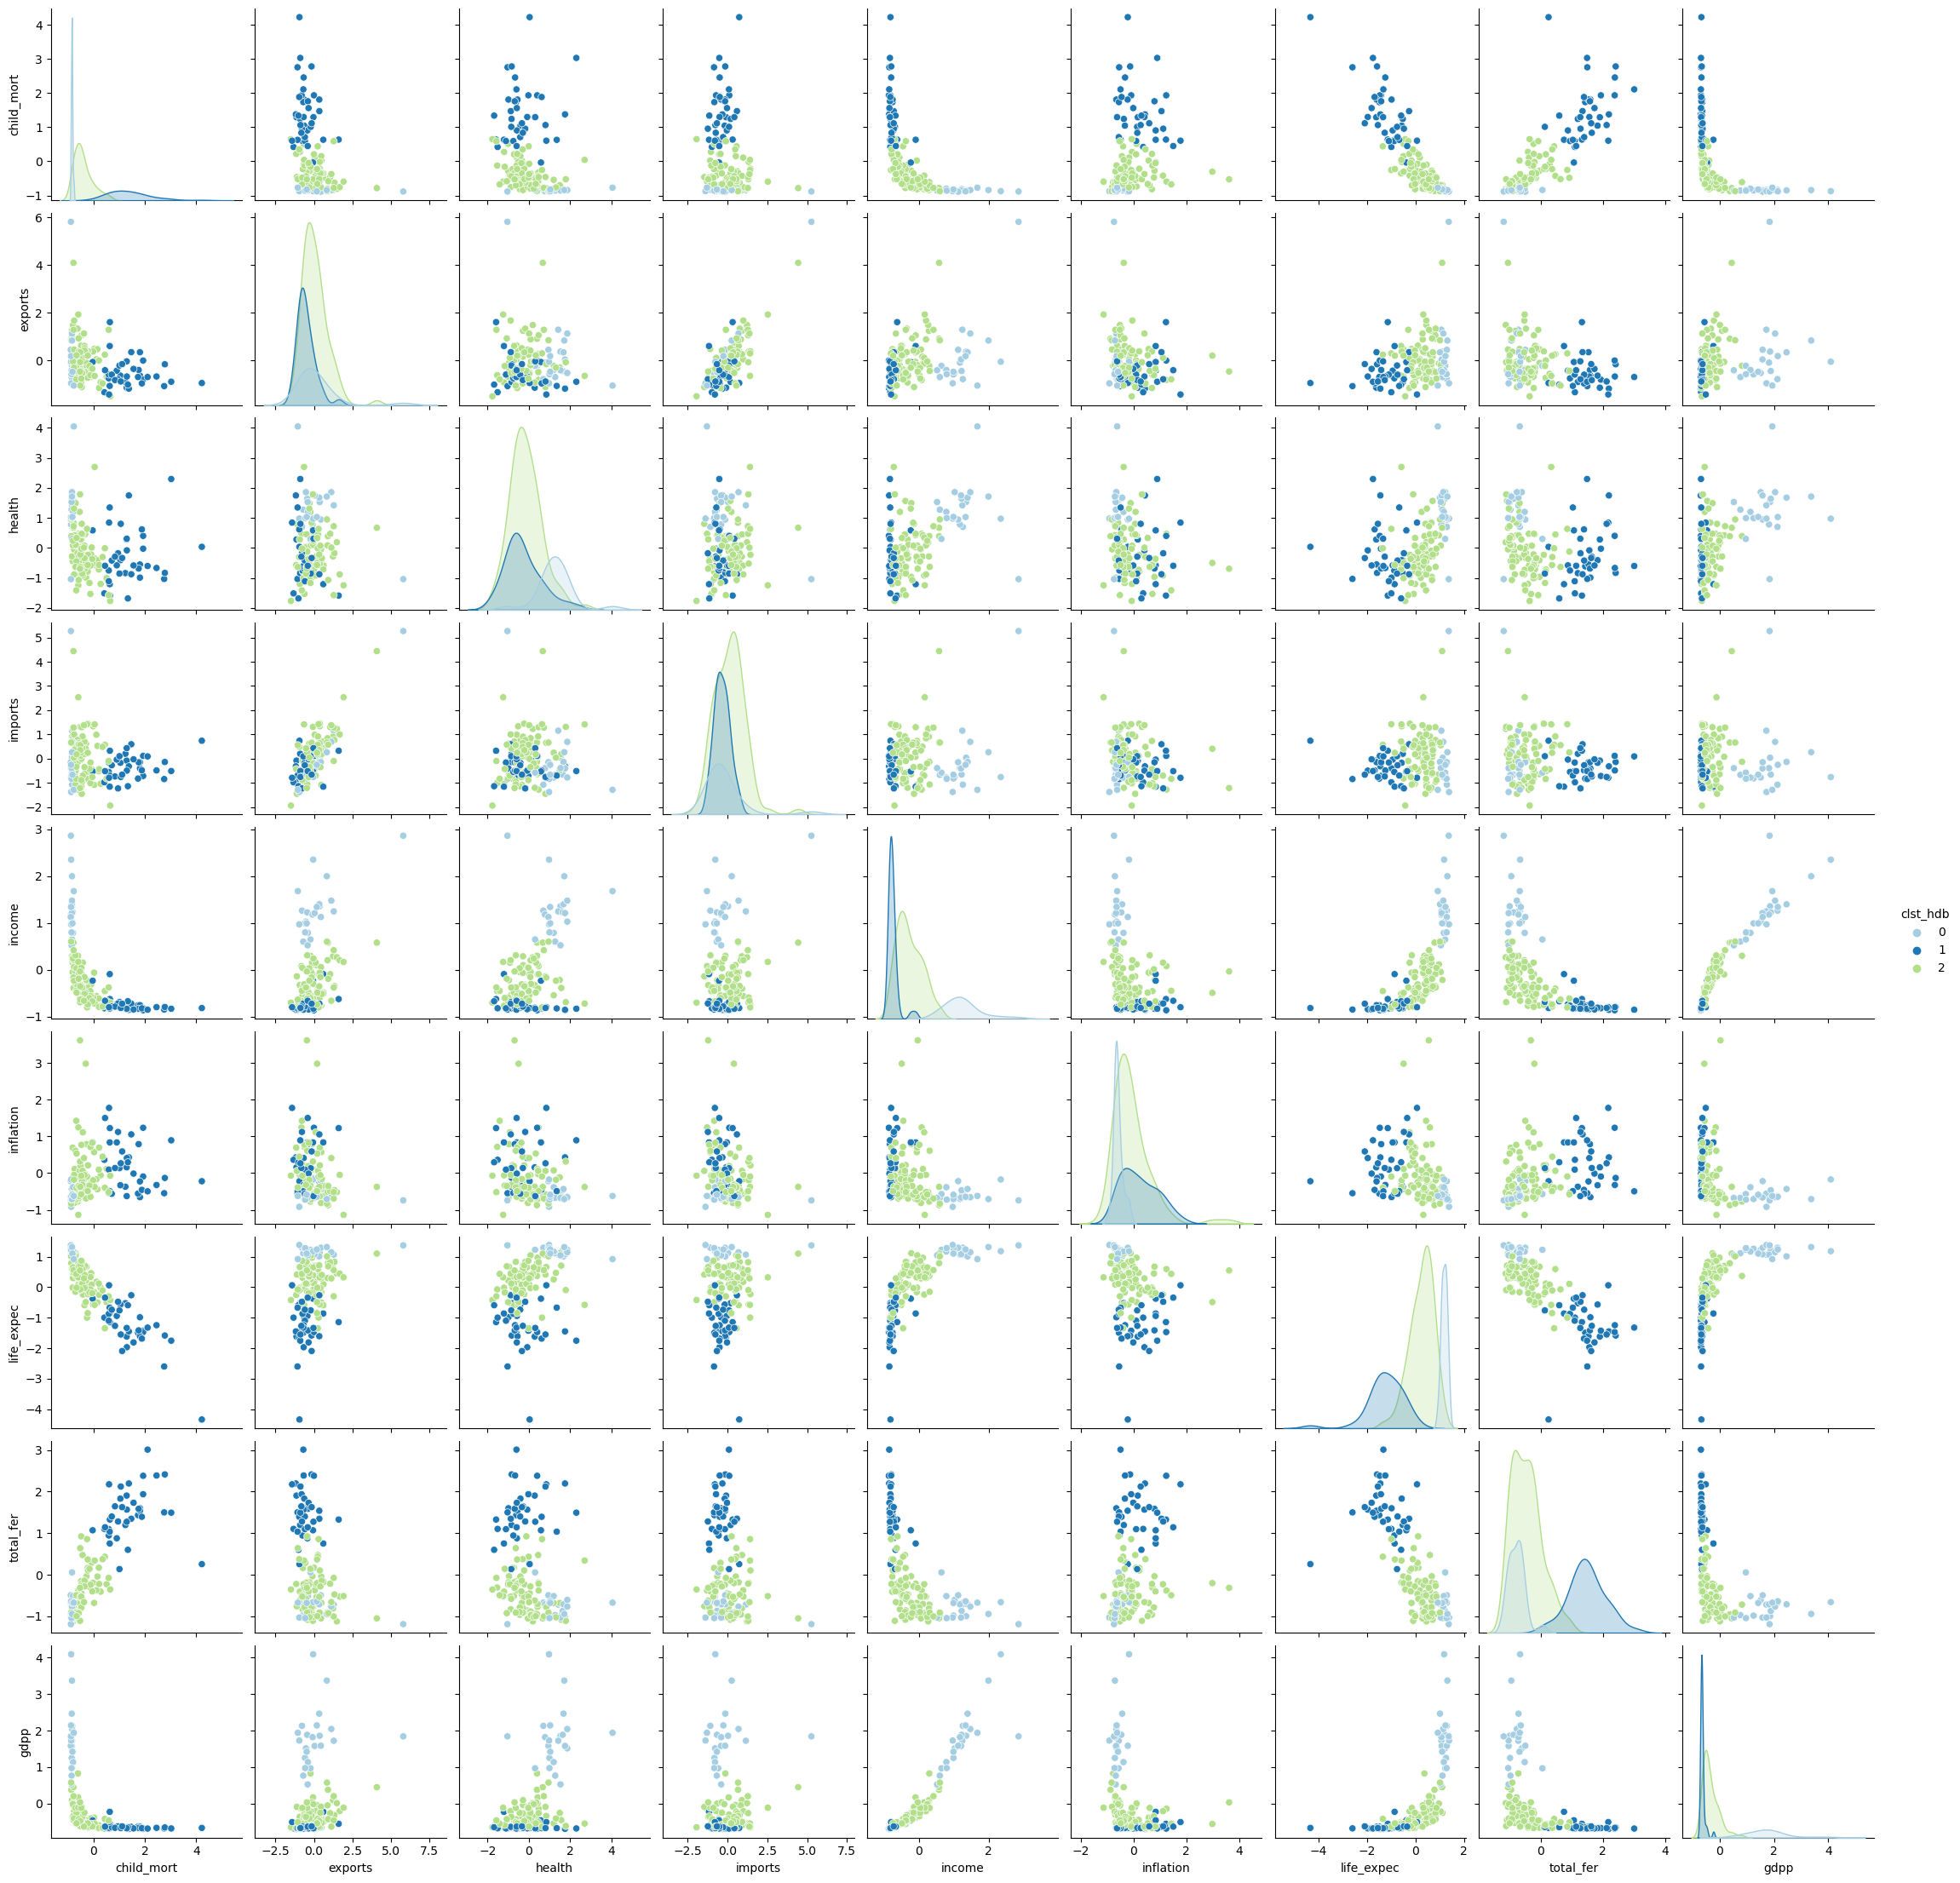

In [154]:
#now we have these 3 clusters 
#lets see how we can characterize them

sns.pairplot(df[num_cols+['clst_hdb']][df['clst_hdb']!=-1], vars = num_cols, hue = 'clst_hdb',palette = "Paired" )

Our pairplot tells us a very clear story of what characterizes these different clusters.
We see a fantastic level of seperation in these clusters in our graphs, which vies us vairly clear makrers for how we can interpret these different 
Cluster 0 is characterized by very low child mortality rates as well as what we would generally consider very strong economies.
Cluster 1 is characrterized by higher child mortality rates, higher fertility rates, and what we could consider much less strong economies. 
Cluster 2 is extremely interesting. These are countries that have much better health outcomes in terms of child mortality, and life expectancy, in spite of  having economies that are only middlingly better overall. 


Yeah its not that deep, i think just might be developed vs devloping vs undeveloped. hahahahhaa, i overdid the analysis 


MY SECRET FEAR IS THAT CLUSTER 2 IS REALLY 2 CLUSTERS FUSED TOGETHER. 
I WILL CONDUCT SECRET WORK UNDER UMAP AND SOME BETTER HDBSCAN PARAMETERS SO WE HAVE A BETTER LOOK.
BUT PLEASE REVIEW WHAT I HAVE WRITTEN FOR THIS, I AM NO ECONOMIST. I KNOW ITS A LOT OF GRAPHS, BUT I DO BELIEVE
IT CAN BE INTERPRETED 

## SECRET WORK

In [155]:
u4 = umap.UMAP(n_components=4, random_state=1009)
cnts_4d = u4.fit_transform(df[num_cols])

C:\Users\zsand\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [168]:
clus = HDBSCAN(min_cluster_size=9,max_cluster_size=70)
clusters = clus.fit_predict(cnts_4d)

In [169]:
pd.Series(clusters).value_counts()

 1    41
 2    38
-1    37
 3    29
 0    22
Name: count, dtype: int64

C:\Users\zsand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


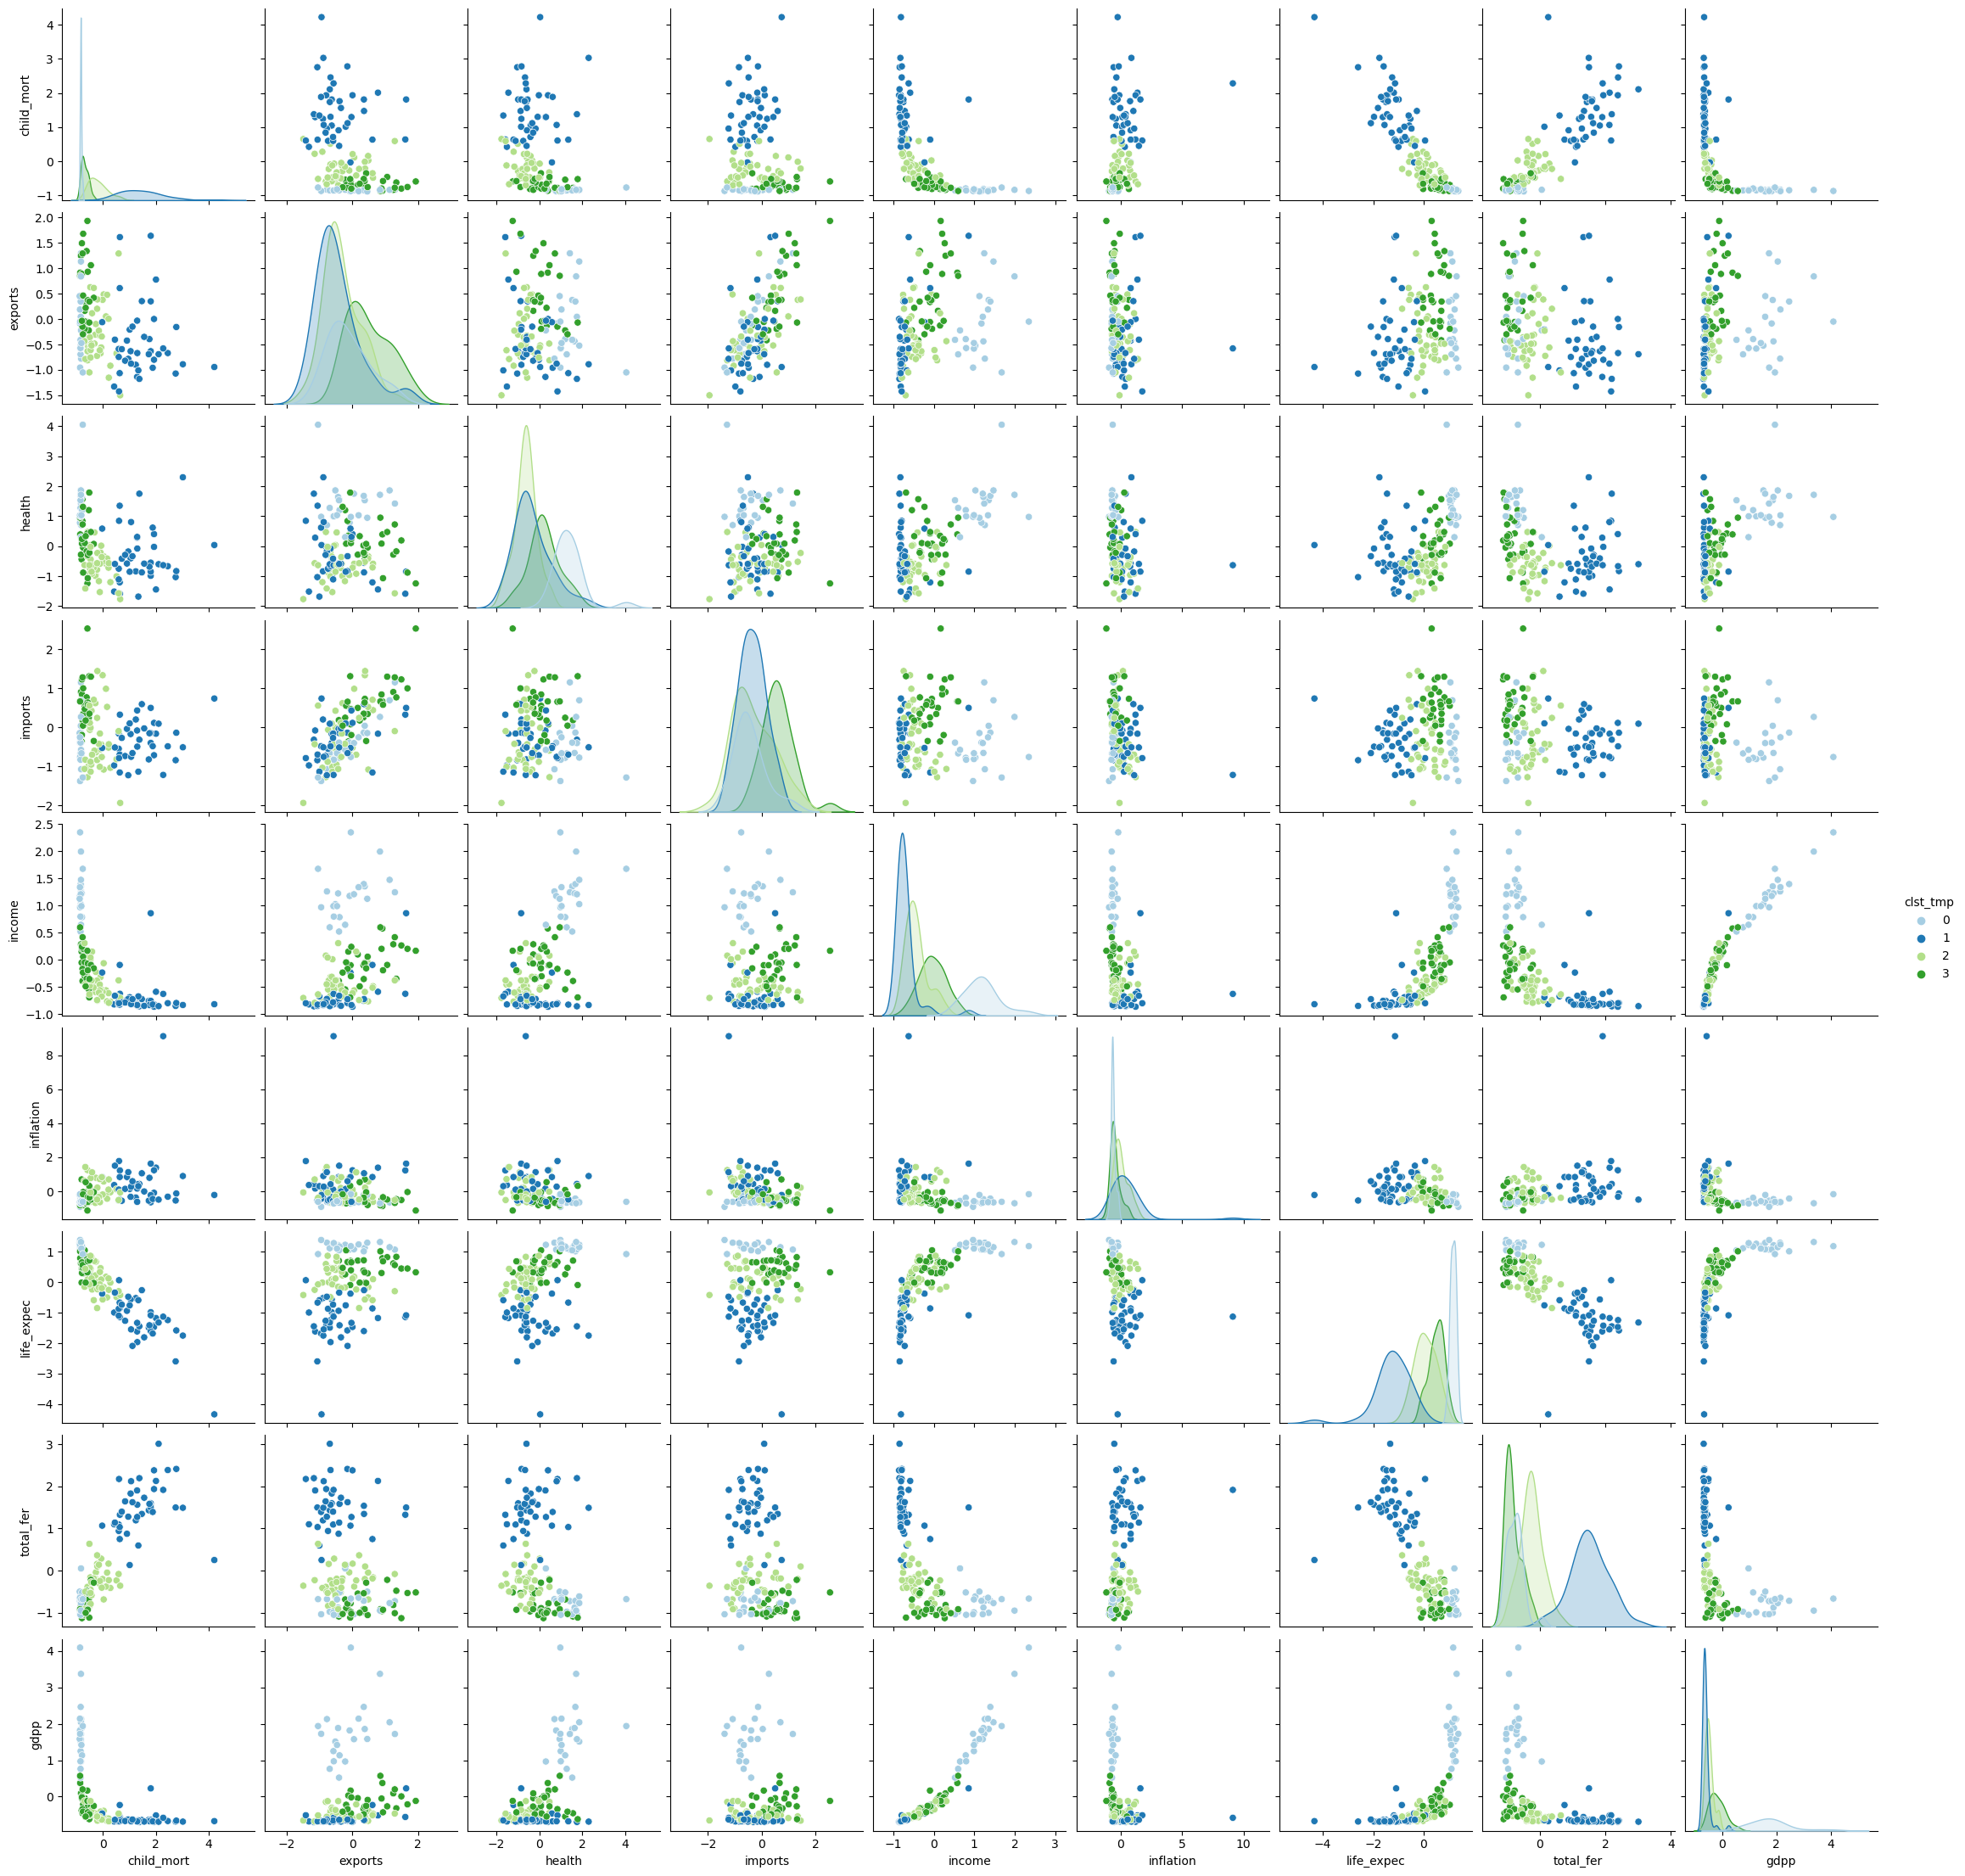

In [171]:
#now we have these 3 clusters 
#lets see how we can characterize them
df['clst_tmp'] = clusters
sns.pairplot(df[num_cols+['clst_tmp']][df['clst_tmp']!=-1], vars = num_cols, hue = 'clst_tmp',palette = "Paired" )

Some more work is in order, to be able to cut down these clusters to something a little more appealing, but i think its being approached here. We need our economists and statisticians to break this shit down

## Back to the real shit

Now that we have identified these clusters, the organization we are working for would like to do a more in depth study about what is going on here. 
We will use the non parametric depth measures to identify the most representative sample in each cluster. A place where resouces can be focused more greatly. IF we dont like this idea we dont have to do it. 


In [18]:
from depth.multivariate import halfspace, simplicial
import numpy as np

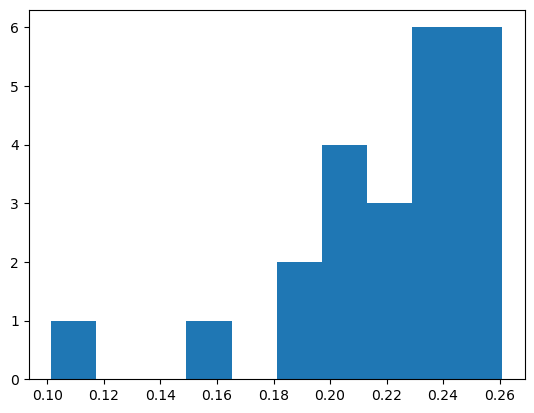

Denmark


In [188]:
plt.hist(simplicial(cnts_5d[df.clst_hdb==0],cnts_5d[df.clst_hdb==0]))
plt.show()
# one clear pick here
print(df.country[df.clst_hdb==0].iloc[np.argmin(simplicial(cnts_5d[df.clst_hdb==0],cnts_5d[df.clst_hdb==0]))])

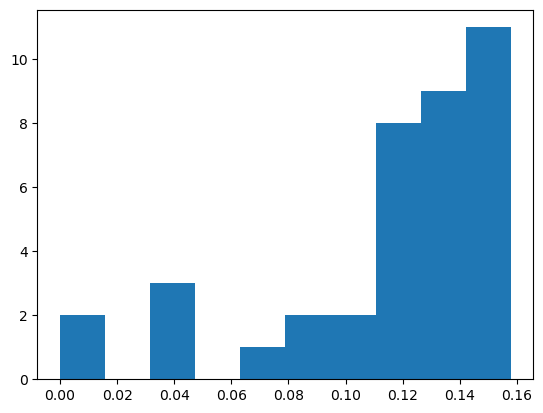

Afghanistan


In [189]:
plt.hist(simplicial(cnts_5d[df.clst_hdb==1],cnts_5d[df.clst_hdb==1]))
plt.show()
# one clear pick here
print(df.country[df.clst_hdb==1].iloc[np.argmin(simplicial(cnts_5d[df.clst_hdb==1],cnts_5d[df.clst_hdb==1]))])
#holy fuck is this slow

In [ ]:
plt.hist(simplicial(cnts_5d[df.clst_hdb==2],cnts_5d[df.clst_hdb==2]))
plt.show()
# one clear pick here
print(df.country[df.clst_hdb==2].iloc[np.argmin(simplicial(cnts_5d[df.clst_hdb==2],cnts_5d[df.clst_hdb==2]))])
#thomas its time to get that fancy computer to work
#mine sure as shit can not do this

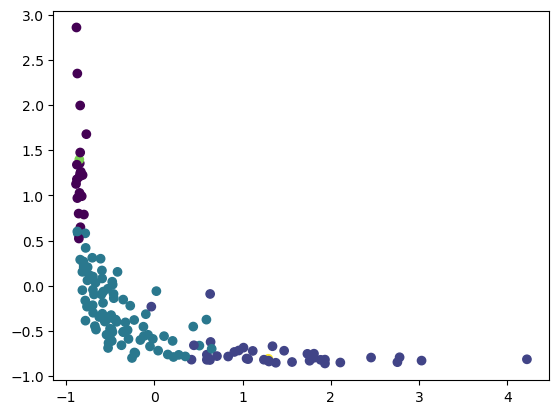

In [28]:
tmp = df['clst_hdb'].copy()
tmp[df.country=='Denmark']=4
tmp[df.country=='Afghanistan']=5
plt.scatter(x=df['child_mort'][df.clst_hdb!=-1],y=df['income'][df.clst_hdb!=-1],c=tmp[df.clst_hdb!=-1] )
#this particular graph sucks, but it if you look clsoely, youll see what we want to see here
# our two countries are literally right in the middle of these two guys
# big sucess here, i think, at least